In [145]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib_inline import backend_inline

# 可缩放的矢量图像图形文件格式(具有边缘清晰、文件体积小、传输方便的特点)
backend_inline.set_matplotlib_formats('svg', quality=100)

In [146]:
class Animator:
    """动态绘制线图(其他图像对应修改)"""

    def __init__(self, line_num):
        self.line_num = line_num  # 绘制线图的数量
        self.fig = plt.figure(figsize=(5, 3))
        self.ax = plt.subplot(111)
        self.ax.set_xlabel('steps')
        self.ax.set_ylabel('loss')
        self.X = []  # x轴坐标点(例:[1, 2, 3, 4])
        # y轴坐标点
        # line_num=1时,例:[(1, ), (4, ), (9, ), (16, )]
        # line_num=2时,例:[(1, 1), (4, 8), (9, 27), (16, 64)]
        # line_num=3时,例:[(1, 1, 1), (4, 8, 16), (9, 27, 81), (16, 64, 256)]
        self.Y = []

    def add(self, x, y,
            labels=None):  # 图例对应的labels
        self.X.append(x)
        self.Y.append(y)
        Y_arr = np.array(self.Y)
        colors = plt.cm.bwr(np.linspace(0, 1, self.line_num))  # RGBA颜色列表
        line_obj = []
        for num in range(self.line_num):
            line_obj.append(self.ax.plot(self.X, Y_arr[:, num], color=colors[num])[0])
        if labels is not None:
            self.ax.legend(handles=line_obj, labels=labels)

        # 核心代码
        display.display(self.fig)
        display.clear_output(wait=True)

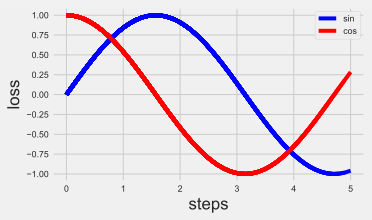

In [147]:
animator = Animator(2)
for i in np.linspace(0, 5.0, num=50):
    animator.add(i, [np.sin(i), np.cos(i)], labels=['sin', 'cos'])